# STA365 HW1
## Lisa Wang

### Q1
**Question:** 

What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

**Answer:** 

Information given: 
- $P(\text{pass}) = 0.9$
- $P(\text{quick} \mid \text{pass}) = 0.6$
- $P(\text{quick} \mid \text{fail}) = 0.3$

Want to find: $P(\text{pass} \mid \text{quick})$:

\begin{align}
P(\text{pass} \mid \text{quick}) &= \frac{P(\text{pass}) P(\text{quick} \mid \text{pass})}{P(\text{quick})} \\[10pt]
&= \frac{P(\text{pass}) P(\text{quick} \mid \text{pass})}{P(\text{quick} \mid \text{pass})P(\text{pass}) + P(\text{quick} \mid \text{fail})P(\text{fail})} \\[10pt]
&= \frac{(0.9)(0.6)}{(0.6)(0.9) + (0.3)(1 - 0.9)} \\[10pt]
&= \frac{0.54}{0.54 + 0.03} \\[10pt]
&= \frac{18}{19} \approx 0.947
\end{align}

Approximately 94.7% of students who answer the question quickly will pass the class. 

# Q2

**Question:**

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

**Answer:**

\begin{align*}
\text{Multinomial Likelihood:} && P(\mathbf{x} \mid \boldsymbol{\theta}, n) &={} \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \\\\
&& \mathbf{x} &= (x_1, x_2, \dots, x_k) \quad \text{(counts for \(k\) categories)} \\\\
&& \boldsymbol{\theta} &= (\theta_1, \theta_2, \dots, \theta_k) \quad \text{(probabilities for each category, \( \sum_{i=1}^k \theta_i = 1 \))} \\\\
&& n &= \sum_{i=1}^k x_i \quad \text{(total count)} \\\\
\text{Dirichelet Prior:} && P(\boldsymbol{\theta} \mid \boldsymbol{\alpha}) &={} \frac{\Gamma\left(\sum_{i=1}^k \alpha_i \right)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} \\\\
\text{Deriving the posterior distribution:} && P(\boldsymbol{\theta} \mid \mathbf{x}, n, \boldsymbol{\alpha}) &={} \frac{P(\mathbf{x} \mid \boldsymbol{\theta}) P(\boldsymbol{\theta} \mid \boldsymbol{\alpha})}{P(\mathbf{x})} \\\\
&&& = \frac{\Gamma\left(\sum_{i=1}^k \alpha_i \right)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} \cdot \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \\\\
&&& \propto \prod_{i=1}^k \theta_i^{\alpha_i - 1} \cdot \prod_{i=1}^k \theta_i^{x_i} \\\\
&&& = \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1} \\\\
&&& \text{Which is the kernel of a Dirichlet distribution.} \\\\
&&& \text{The posterior distribution is Dirichlet with parameters } \alpha_i + x_i \text{ for } i = 1, 2, \dots, k.
\end{align*}

# Q3

**Question:**

Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

**Answer:**

### Visualize the multinomial distribution and the multinomial sample

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multinomial
import plotly.figure_factory as ff

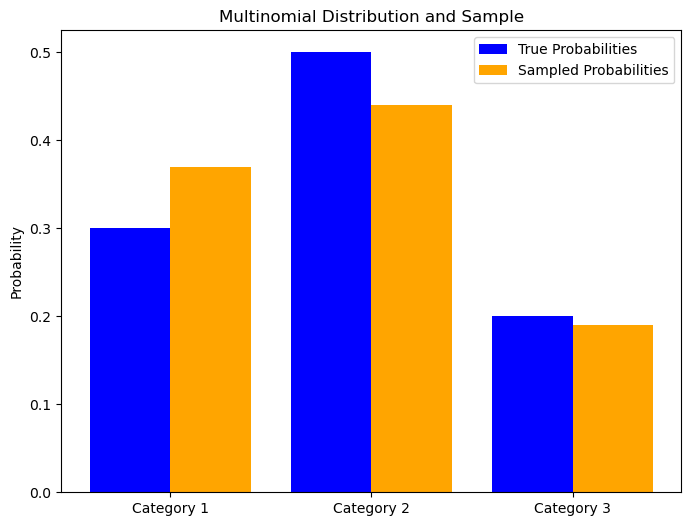

In [113]:
# Set seed
np.random.seed(365)

# Parameters for multinomial distribution
n_trials = 100  # Number of trials
p_true = [0.3, 0.5, 0.2]  # True probabilities for the categories

# Generate multinomial samples
sample = multinomial.rvs(n=n_trials, p=p_true, size=1)

# Calculate sampled probabilities
sampled_probabilities = sample[0] / n_trials  # Extract the first sample

# Create plot
categories_labels = ['Category 1', 'Category 2', 'Category 3']
x = np.arange(len(categories_labels))  # Positions for the bars

plt.figure(figsize=(8, 6))

# Plot true probabilities (blue)
plt.bar(
    x - 0.2,  # Move bar to the left
    p_true,
    width=0.4,
    label="True Probabilities",
    color="blue"
)

# Plot sampled probabilities (orange)
plt.bar(
    x + 0.2,  # Move bar to the right
    sampled_probabilities,
    width=0.4,
    label="Sampled Probabilities",
    color="orange"
)

# Add title and labels
plt.title('Multinomial Distribution and Sample')
plt.ylabel('Probability')
plt.xticks(x, categories_labels)
plt.legend()
plt.show()

### Visualize the simplex Dirichlet distribution of the prior & the posterior

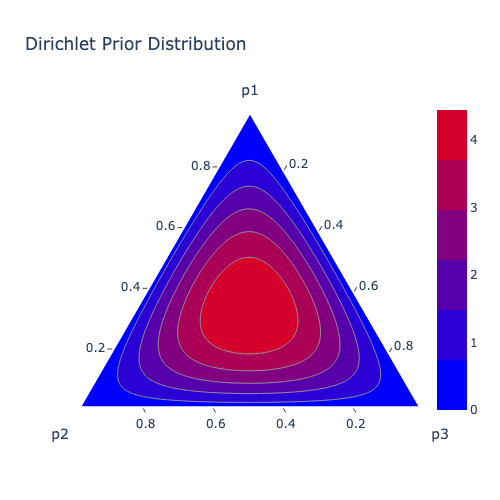

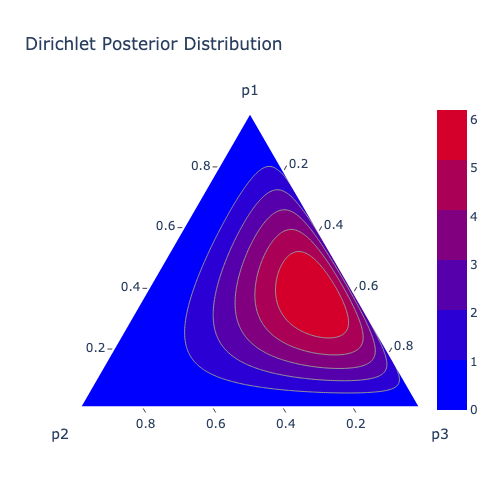

In [149]:
np.random.seed(365)

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Exclude points where p3<0
valid = p3 >= 0
p = p[valid]

# Define prior alpha values
alpha_prior = np.array([2, 2, 2])  
dirichlet_prior = dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# Visualize prior distribution
fig_prior = ff.create_ternary_contour(
    p.T,
    dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title='Dirichlet Prior Distribution') # Add plot title
fig_prior.show('png')

# Define posterior alpha values
alpha_posterior = np.array([2.5, 1.5, 3.0])  
dirichlet_posterior = dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Visualize posterior distribution
fig_posterior = ff.create_ternary_contour(
    p.T,
    dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title='Dirichlet Posterior Distribution') # Add plot title
fig_posterior.show('png')
